Sample dataset 'website_traffic.csv' created.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         30 non-null     object 
 1   page_views        30 non-null     int64  
 2   session_duration  30 non-null     int64  
 3   bounce_rate       30 non-null     float64
 4   traffic_source    30 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ KB
None
             timestamp  page_views  session_duration  bounce_rate  \
0  2025-02-08 08:55:51        3134               297        60.31   
1  2025-02-09 08:55:51        3756               202        79.85   
2  2025-02-10 08:55:51        1256               167        46.05   
3  2025-02-11 08:55:51        3587                62        30.58   
4  2025-02-12 08:55:51        3749                62        36.40   

  traffic_source  
0         Direct  
1  

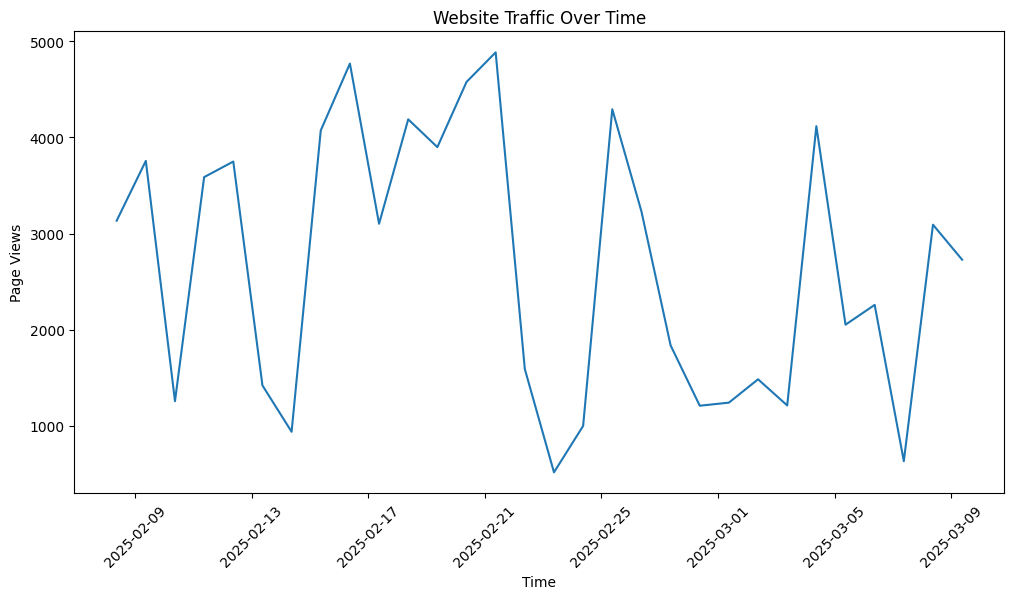

<ipython-input-2-adef599740b8>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['traffic_source'], data=df, palette="coolwarm")


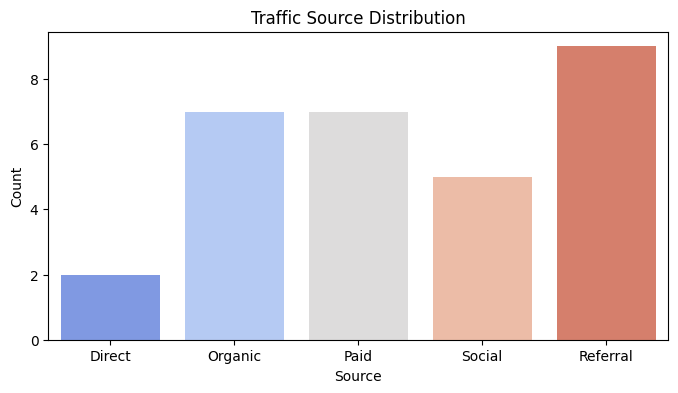

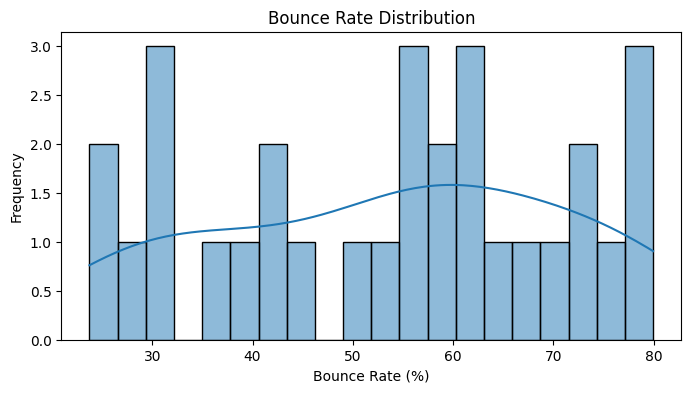

<ipython-input-2-adef599740b8>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_session_duration.index, y=avg_session_duration.values, palette="viridis")


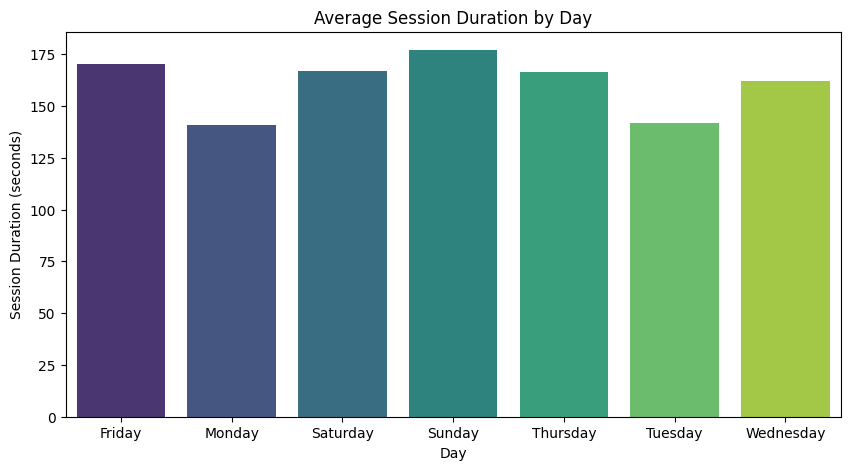

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a sample website_traffic.csv file if it doesn't exist
import os
import random
from datetime import datetime, timedelta

# Check if the CSV file exists; if not, create it
csv_filename = "website_traffic.csv"
if not os.path.exists(csv_filename):
    # Generate a date range for the last 30 days
    num_days = 30
    start_date = datetime.now() - timedelta(days=num_days)
    dates = [start_date + timedelta(days=i) for i in range(num_days)]

    # Generate sample website traffic data
    data = {
        "timestamp": [date.strftime("%Y-%m-%d %H:%M:%S") for date in dates],
        "page_views": [random.randint(500, 5000) for _ in range(num_days)],
        "session_duration": [random.randint(30, 300) for _ in range(num_days)],  # in seconds
        "bounce_rate": [round(random.uniform(20, 80), 2) for _ in range(num_days)],  # in %
        "traffic_source": random.choices(["Organic", "Direct", "Referral", "Social", "Paid"], k=num_days)
    }

    # Create and save the dataset
    df = pd.DataFrame(data)
    df.to_csv(csv_filename, index=False)
    print("Sample dataset 'website_traffic.csv' created.")

# Load the dataset
df = pd.read_csv(csv_filename)

# Display basic dataset info
print(df.info())
print(df.head())

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract hour and day for analysis
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day_name()

# Plot traffic over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['timestamp'], y=df['page_views'])
plt.title("Website Traffic Over Time")
plt.xlabel("Time")
plt.ylabel("Page Views")
plt.xticks(rotation=45)
plt.show()

# Analyze traffic sources
plt.figure(figsize=(8, 4))
sns.countplot(x=df['traffic_source'], data=df, palette="coolwarm")
plt.title("Traffic Source Distribution")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

# Bounce rate analysis
plt.figure(figsize=(8, 4))
sns.histplot(df['bounce_rate'], bins=20, kde=True)
plt.title("Bounce Rate Distribution")
plt.xlabel("Bounce Rate (%)")
plt.ylabel("Frequency")
plt.show()

# Average session duration by day
avg_session_duration = df.groupby('day')['session_duration'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_session_duration.index, y=avg_session_duration.values, palette="viridis")
plt.title("Average Session Duration by Day")
plt.xlabel("Day")
plt.ylabel("Session Duration (seconds)")
plt.show()
